<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Supervised%20Learning%20with%20Scikit-Learn/Time%20Series%20Analysis%20in%20Python/5%20Putting%20It%20All%20Together/5_Putting_It_All_Together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Putting It All Together

This chapter will show you how to model two series jointly using cointegration models. Then you'll wrap up with a case study where you look at a time series of temperature data from New York City

# Cointegration Models

1. Cointegration Models
The idea behind cointegration is

2. What is Cointegration?
that even if the prices of two different assets both follow random walks, it is still possible that a linear combination of them is not a random walk. If that's true, then even though P and Q are not forecastable because they're random walks, the linear combination is forecastable, and we say that P and Q are cointegrated.

3. Analogy: Dog on a Leash
The best analogy I've heard is of a dog owner walking his dog with a retractable leash. If you look at the position of the dog owner, it may follow a random walk, and if you look at the position of the dog separately, it also may follow a random walk, but the distance between them, the difference of their positions, may very well be mean reverting: if the dog is behind the owner, he may run to catch up and if the dog is ahead, the length of the leash may prevent him from getting too far ahead. The dog and its owner are linked together and their distance is a mean reverting process.

4. Example: Heating Oil and Natural Gas
Both Heating Oil prices and Natural Gas prices look like they're random walks. But when you look at the spread,

5. Example: Heating Oil and Natural Gas
or difference between them, the series looks like it's mean reverting. For example, when heating oil spiked down relative to natural gas in 2001, the spread reverted back.

6. What Types of Series are Cointegrated?
With commodities, there may be economic forces that link the two prices. Consider heating oil and natural gas. Some power plants have the ability to use either one, depending on which has become cheaper. So when heating oil has dipped below natural gas, increased demand for heating oil will push it back up. Platinum and Palladium are substitutes in some types of catalytic converters used for emission control. Corn and wheat are substitutes for animal feed. Corn and sugar are substitutes as sweeteners, etc. How about bitcoin and ethereum? In one of the exercises, you'll look at whether they are cointegrated. For stocks, a natural starting point for identifying cointegrated pairs are stocks in the same industry. However, competitors are not necessarily economic substitutes. Think of Apple and Blackberry. It's not necessarily the case that when one of those company's stock price jumps up, the other catches up. In this case, it's more like the dog broke the leash and ran way from the owner.

7. Two Steps to Test for Cointegration
You can break down the process for testing whether two series are cointegrated into two steps. First, you regress the level of one series on the level of the other series, to get the slope coefficient c. Then, you run the Augmented Dickey-Fuller test, the test for a random walk that you learned about in the second chapter, on the linear combination of the two series. Alternatively, statsmodels has a function coint that combines both steps.

8. Let's practice!
Now let's try some examples.

# A Dog on a Leash? (Part 1)

The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG. First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in \$/gallon, by 7.25, which converts it to \$/millionBTU, which is the same units as Natural Gas).

The data for continuous futures (each contract has to be spliced together in a continuous series as contracts expire) was obtained from [Quandl](https://blog.quandl.com/api-for-futures-data).

Instructions

1. Plot Heating Oil, HO, and Natural Gas, NG, on the same subplot

2. Make sure you multiply the HO price by 7.25 to match the units of NG

3. Plot the spread on a second subplot

4. The spread will be 7.25*HO - NG

In [ ]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

Conclusion

Notice from the plot that when Heating Oil briefly dipped below Natural Gas, it quickly reverted back up.

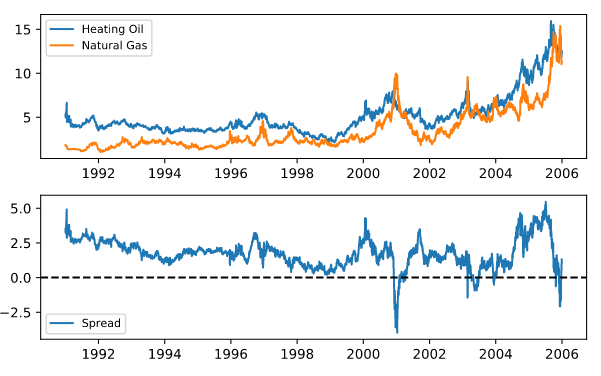

# A Dog on a Leash? (Part 2)

To verify that Heating Oil and Natural Gas prices are cointegrated, First apply the Dickey-Fuller test separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG.

Instructions

1. Perform the adfuller test on HO and on NG separately, and save the results (results are a list)

 - The argument for adfuller must be a series, so you need to include the column 'Close'

 - Print just the p-value (item [1] in the list)

2. Do the same thing for the spread, again converting the units of HO, and using the column 'Close' of each DataFrame

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

'''
<script.py> output:
    The p-value for the ADF test on HO is  0.9567108785017869
    The p-value for the ADF test on NG is  0.900874744467673
    The p-value for the ADF test on the spread is  7.01943930214218e-05
'''

Conclusion

As we expected, we cannot reject the hypothesis that the individual futures are random walks, but we can reject that the spread is a random walk.

# Are Bitcoin and Ethereum Cointegrated?

Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, and then perform an ADF test on the residuals of the regression. In the last example, there was no need to perform the first step since we implicitly assumed the cointegration vector was <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mo stretchy="false">(</mo>
    <mn>1</mn>
    <mo>,</mo>
    <mo>&#x2212;</mo>
    <mn>1</mn>
    <mo stretchy="false">)</mo>
  </mstyle>
</math>. In other words, we took the difference between the two series (after doing a units conversion). Here, you will do both steps.

You will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coefficient <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>b</mi>
  </mstyle>
</math>, then the cointegration vector is simply <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mo stretchy="false">(</mo>
    <mn>1</mn>
    <mo>,</mo>
    <mo>&#x2212;</mo>
    <mi>b</mi>
    <mo stretchy="false">)</mo>
  </mstyle>
</math>. Then perform the ADF test on BTC <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>b</mi>
  </mstyle>
</math> ETH. Bitcoin and Ethereum prices are pre-loaded in DataFrames BTC and ETH.

Instructions

1. Import the statsmodels module for regression and the adfuller function

2. Add a constant to the ETH DataFrame using sm.add_constant()

3. Regress BTC on ETH using sm.OLS(y,x).fit(), where y is the dependent variable and x is the independent variable, and save the results in result.
 
 - The intercept is in result.params[0] and the slope in result.params[1]

4. Run ADF test on BTC <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mo>&#x2212;</mo>
    <mi>b</mi>
  </mstyle>
</math> ETH

In [ ]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

'''
The data suggests that Bitcoin and Ethereum are cointegrated.

<script.py> output:
    The p-value for the ADF test is  0.023369002323472707
'''

# Case Study: Climate Change

Got It!
1. Case Study: Climate Change
As a final exercise that will pull together many of the concepts throughout this course, you'll

2. Analyzing Temperature Data
analyze some temperature data taken over almost 150 years. The data was downloaded from the NOAA website. First, you'll practice some pandas methods by converting the index to datetime and plotting the data. Then, you'll run the Augmented

3. Analyzing Temperature Data
Dickey-Fuller test to see whether the data is a Random Walk. Then, you'll take first differences of the data to transform it into a stationary series, and compute the Autocorrelation Function and the Partial Autocorrelation Function of the data. Using that as a guide, you'll fit a few AR, MA, and ARMA models to the data. Then you'll use the Information Criterion to choose the best model among the ones you looked at. Finally, with the best model, you'll forecast temperatures over the next 30 years.

4. Let's practice!
Time to put this into practice.

# Is Temperature a Random Walk (with Drift)?

An ARMA model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics covered in this class.

The DataFrame temp_NY contains the average annual temperature in Central Park, NY from 1870-2016 (the data was downloaded from the NOAA [here](https://www.ncdc.noaa.gov/cdo-web/search)). Plot the data and test whether it follows a random walk (with drift).

Instructions

1. Convert the index of years into a datetime object using pd.to_datetime(), and since the data is annual, pass the argument format='%Y'.

2. Plot the data using .plot()

3. Compute the p-value the Augmented Dickey Fuller test using the adfuller function.

4. Save the results of the ADF test in result, and print out the p-value in result[1].

In [ ]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

'''
<script.py> output:
    The p-value for the ADF test is  0.5832938987871152
'''

Conclusion

The data seems to follow a random walk with drift.

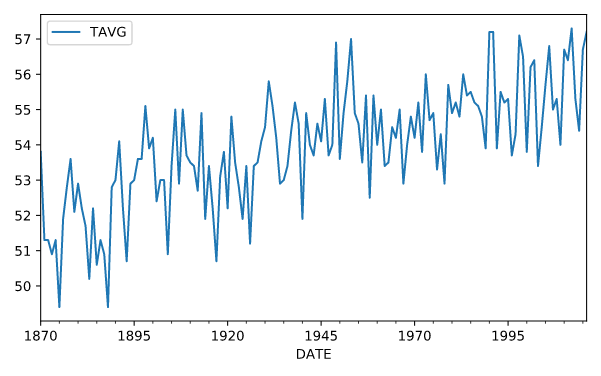

# Getting "Warmed" Up: Look at Autocorrelations

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

Instructions

1. Import the modules for plotting the sample ACF and PACF

2. Take first differences of the DataFrame temp_NY using the pandas method .diff()

3. Create two subplots for plotting the ACF and PACF

 - Plot the sample ACF of the differenced series

 - Plot the sample PACF of the differenced series

In [ ]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

Conclusion

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

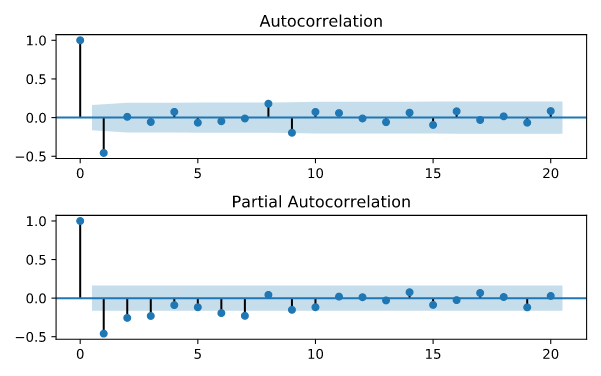

# Which ARMA Model is Best?

Recall from Chapter 3 that the Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters to discourage overfitting. Lower AIC scores are better.

Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARMA(1,1) models have one more parameter than the AR(1) has.

The annual change in temperature is in a DataFrame chg_temp.

Instructions

1. For each ARMA model, create an instance of the ARMA class, passing the data and the order=(p,q). p is the autoregressive order; q is the moving average order.

2. Fit the model using the method .fit().

3. Print the AIC value, found in the .aic element of the results.

In [ ]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

'''
Conclusion

The ARMA(1,1) has the lowest AIC values among the three models.

<script.py> output:
    The AIC for an AR(1) is:  510.534689831391
    The AIC for an AR(2) is:  501.9274123160228
    The AIC for an ARMA(1,1) is:  469.07291479787045
'''

# Don't Throw Out That Winter Coat Yet

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the ARIMA module on the temperature data (before differencing), which is identical to using the ARMA module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

The data is preloaded in a DataFrame called temp_NY.

Instructions

1. Create an instance of the ARIMA class called mod for an integrated ARMA(1,1) model

 - The d in order(p,d,q) is one, since we first differenced once

 - Fit mod using the .fit() method and call the results res

2. Forecast the series using the plot_predict() method on res

 - Choose the start date as 1872-01-01 and the end date as 2046-01-01

In [ ]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

Conclusion

According to the model, the temperature is expected to be about 0.6 degrees higher in 30 years (almost entirely due to the trend), but the 95% confidence interval around that is over 5 degrees.

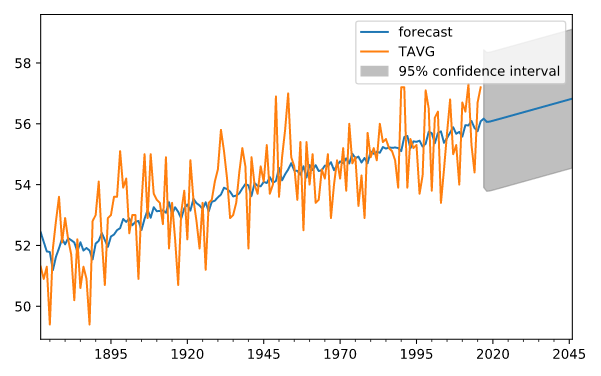

# Congratulations

1. Congratulations
Congratulations on mastering the time series introductory material. This course will hopefully have given you the foundation to learn about more advanced time series concepts.

2. Advanced Topics
Some more advanced topics are GARCH Models, Nonlinear Models, Multivariate Time Series Models, Regime Switching Models, State Space Models and Kalman Filtering.

3. Keep practicing!
I hope you can make more time for time series!